In [1]:
import datetime
today = datetime.date.today()
date = str(today)
#date = "2020-03-26"

#url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-%s.xlsx" % date
url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx"

import pandas as pd
data = pd.read_excel(url)

In [2]:
countries = ['DE', 'ES', 'FR', 'IT', 'SE', 'UK', 'US', 'KR', 'JP', 'CN', 'IN']

import math
def rawData(df, title):
    cases = pd.DataFrame(columns = ['Date'])

    for country in countries:
        countryData = df[df['geoId'] == country][['dateRep', title]]
        countryData.columns = ['Date', country]
        cases = pd.merge(cases, countryData, on='Date', how='right')
        cases = cases.fillna(0)

    return cases.sort_values(by=['Date'])

def sumData(df):
    a = df[countries].to_numpy()

    for i in range(1, df.shape[0]):
        a[i] = a[i] + a[i - 1]

    return pd.DataFrame(data=a, index=cases['Date'], columns=countries)

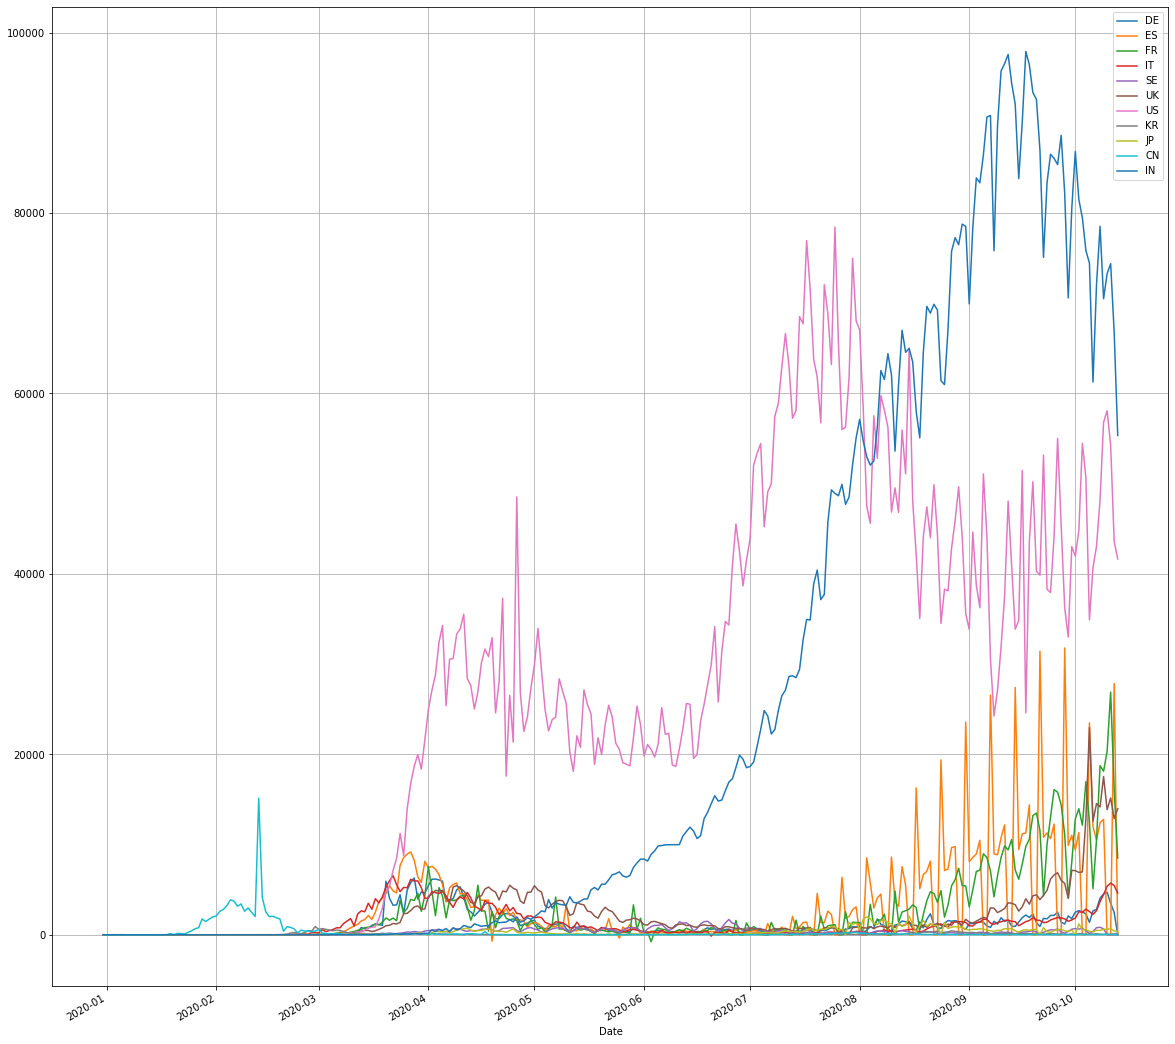

In [3]:
cases = rawData(data, 'cases')
cases.plot.line(x='Date', y=countries, figsize=(20, 20), grid=True)

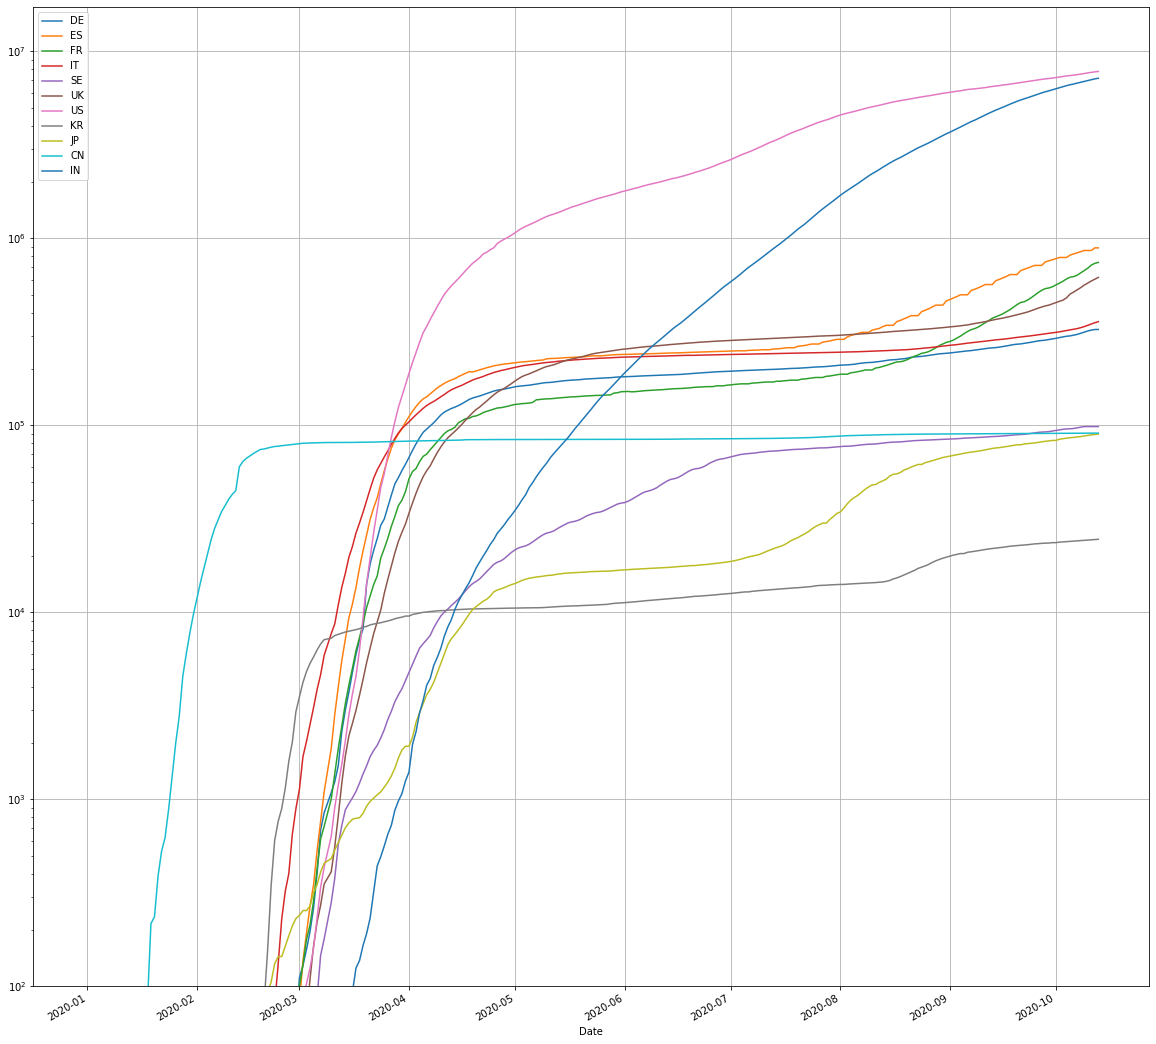

In [4]:
sumCases = sumData(cases)
sumCases.plot.line(logy=True, figsize=(20, 20), ylim=(100, None), grid=True)

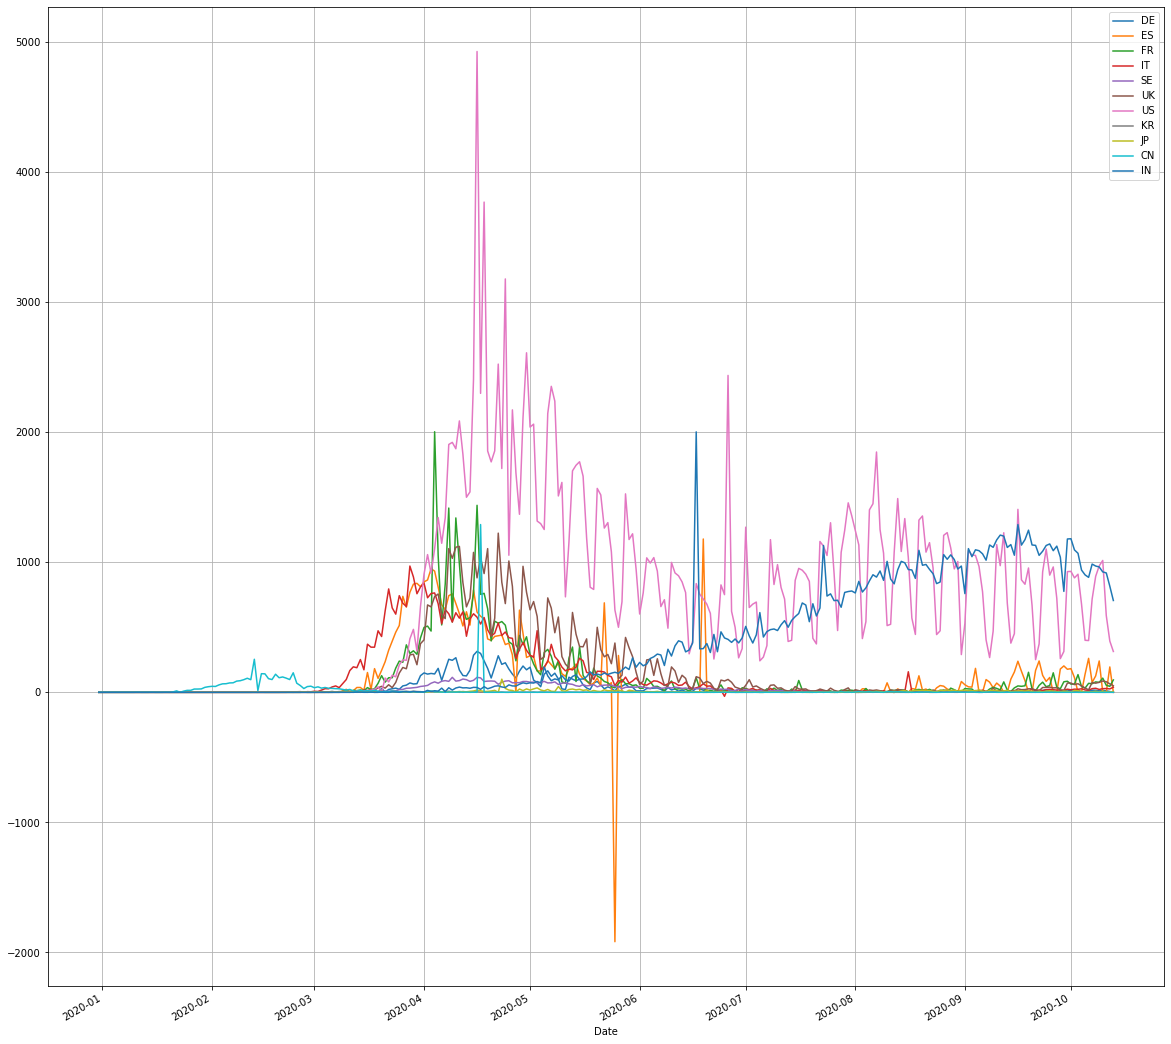

In [5]:
deaths = rawData(data, 'deaths')
deaths.plot.line(x='Date', y=countries, figsize=(20, 20), grid=True)

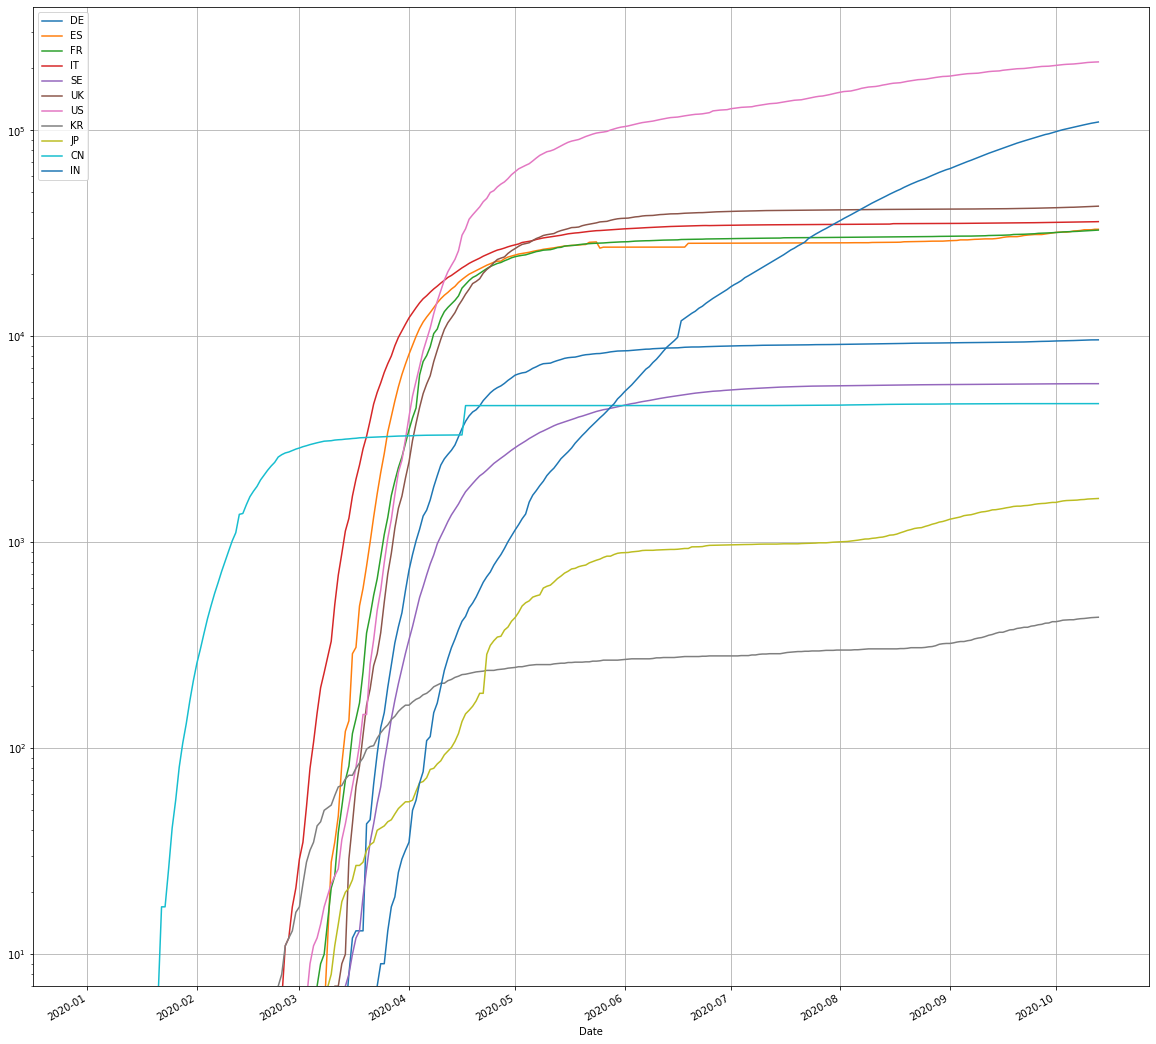

In [6]:
sumDeaths = sumData(deaths)
sumDeaths.plot.line(logy=True, figsize=(20, 20), ylim=(7, None), grid=True)

In [7]:
cases.tail(15)

,Date,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
13,2020-09-29,2089.0,9906.0,4070,1494,379,4044,32998,38,363,22,70589
12,2020-09-30,1798.0,11016.0,8051,1647,613,7143,43017,113,516,23,80472
11,2020-10-01,2503.0,9419.0,12845,1850,688,7108,41982,0,0,0,86821
10,2020-10-02,2673.0,11325.0,13970,2548,634,6914,44771,140,1205,39,81484
9,2020-10-03,2563.0,0.0,12148,2499,712,6968,54471,75,553,17,79476
8,2020-10-04,2279.0,0.0,16972,2843,461,12871,50659,64,571,20,75829
7,2020-10-05,1382.0,23480.0,12545,2578,155,22961,34901,73,400,25,74442
6,2020-10-06,2639.0,11998.0,5104,2257,375,12593,40705,75,308,23,61267
5,2020-10-07,2828.0,10491.0,10489,2677,786,14542,43062,114,496,15,72049
4,2020-10-08,4058.0,12423.0,18746,3677,831,14162,48182,69,477,22,78524


In [8]:
sumCases.tail(15)

,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2020-09-29,287366.0,757739.0,542229.0,309872.0,92493.0,438953.0,7147923.0,23451.0,82461.0,90460.0,6145291.0
2020-09-30,289164.0,768755.0,550280.0,311519.0,93106.0,446096.0,7190940.0,23564.0,82977.0,90483.0,6225763.0
2020-10-01,291667.0,778174.0,563125.0,313369.0,93794.0,453204.0,7232922.0,23564.0,82977.0,90483.0,6312584.0
2020-10-02,294340.0,789499.0,577095.0,315917.0,94428.0,460118.0,7277693.0,23704.0,84182.0,90522.0,6394068.0
2020-10-03,296903.0,789499.0,589243.0,318416.0,95140.0,467086.0,7332164.0,23779.0,84735.0,90539.0,6473544.0
2020-10-04,299182.0,789499.0,606215.0,321259.0,95601.0,479957.0,7382823.0,23843.0,85306.0,90559.0,6549373.0
2020-10-05,300564.0,812979.0,618760.0,323837.0,95756.0,502918.0,7417724.0,23916.0,85706.0,90584.0,6623815.0
2020-10-06,303203.0,824977.0,623864.0,326094.0,96131.0,515511.0,7458429.0,23991.0,86014.0,90607.0,6685082.0
2020-10-07,306031.0,835468.0,634353.0,328771.0,96917.0,530053.0,7501491.0,24105.0,86510.0,90622.0,6757131.0


In [9]:
deaths.tail(15)

,Date,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
13,2020-09-29,11.0,203.0,81,16,1,13,314,1,9,0,776
12,2020-09-30,17.0,177.0,85,24,1,71,928,6,7,0,1179
11,2020-10-01,12.0,182.0,63,19,2,71,930,0,0,0,1181
10,2020-10-02,8.0,113.0,63,24,1,59,880,3,14,0,1095
9,2020-10-03,19.0,0.0,136,23,2,66,908,4,12,0,1069
8,2020-10-04,2.0,0.0,43,27,1,49,678,1,7,0,940
7,2020-10-05,5.0,139.0,32,18,2,33,400,1,2,0,903
6,2020-10-06,12.0,261.0,69,16,2,19,398,0,3,0,884
5,2020-10-07,16.0,76.0,66,28,1,76,717,3,3,0,986
4,2020-10-08,16.0,126.0,80,31,0,70,892,2,8,0,971


In [10]:
sumDeaths.tail(15)

,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2020-09-29,9471.0,31614.0,31799.0,35718.0,5882.0,42001.0,205066.0,406.0,1556.0,4716.0,96318.0
2020-09-30,9488.0,31791.0,31884.0,35742.0,5883.0,42072.0,205994.0,412.0,1563.0,4716.0,97497.0
2020-10-01,9500.0,31973.0,31947.0,35761.0,5885.0,42143.0,206924.0,412.0,1563.0,4716.0,98678.0
2020-10-02,9508.0,32086.0,32010.0,35785.0,5886.0,42202.0,207804.0,415.0,1577.0,4716.0,99773.0
2020-10-03,9527.0,32086.0,32146.0,35808.0,5888.0,42268.0,208712.0,419.0,1589.0,4716.0,100842.0
2020-10-04,9529.0,32086.0,32189.0,35835.0,5889.0,42317.0,209390.0,420.0,1596.0,4716.0,101782.0
2020-10-05,9534.0,32225.0,32221.0,35853.0,5891.0,42350.0,209790.0,421.0,1598.0,4716.0,102685.0
2020-10-06,9546.0,32486.0,32290.0,35869.0,5893.0,42369.0,210188.0,421.0,1601.0,4716.0,103569.0
2020-10-07,9562.0,32562.0,32356.0,35897.0,5894.0,42445.0,210905.0,424.0,1604.0,4716.0,104555.0
